## Neural network

In [39]:
import pandas as pd
from keras import models
import matplotlib.pyplot as plt
import numpy as np



In [40]:
x = pd.read_csv('Training Data classify pt NN/Logistic_X_Train.csv')  # Moons dataset
y = pd.read_csv('Training Data classify pt NN/Logistic_Y_Train.csv')

In [41]:
x = x.values

In [42]:
y = y.values

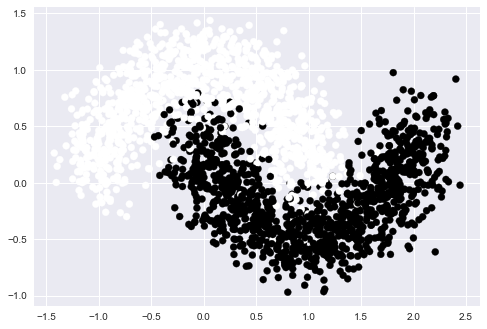

In [43]:
plt.style.use('seaborn')
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [44]:
def softmax(a):
    epa = np.exp(a)
    return epa/np.sum(epa,axis=1,keepdims=True)

In [45]:
class NeuralNetwork:
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        model = {}
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))

        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))

        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))

        self.model = model

    def forward(self,x):

        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']

        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1)

        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)

        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)

        #Store the outputs of each layer for back-propagation
        self.activation_outputs = (a1,a2,y_)

        return y_

    def backward(self,x,y,learning_rate=0.001):

        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs

        delta3 = y_ - y

        dw3 = np.dot(a2.T,delta3) #)h2+1,C) => (h2+1,m) X (m,C)
        db3 = np.sum(delta3,axis=0)

        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)  #(m,h2+1) => (m,h2+1) *(m,C X C,h2+1)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)

        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(x.T,delta1)
        db1 = np.sum(delta1,axis=0)

        self.model['W1'] -= learning_rate*dw1
        self.model['W2'] -= learning_rate*dw2
        self.model['W3'] -= learning_rate*dw3

        self.model['b1'] -= learning_rate*db1
        self.model['b2'] -= learning_rate*db2
        self.model['b3'] -= learning_rate*db3



    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)

    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs

        print("W1 ",W1.shape)
        print("A1 ",a1.shape)

        print("W2 ",W2.shape)
        print("A2 ",a2.shape)

        print("W3 ",W3.shape)
        print("Y_ ",y_.shape)

In [46]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

def one_hot(y,depth):
    m = y.shape[0]
    y_oht = np.zeros((m, depth))
    y_oht[np.arange(m), y] = 1
    return y_oht

In [47]:
def train(X,Y,model,epochs,learning_rate=0.002,logs=True):
    """Creates and Model and Trains it!"""

    training_loss = []
    val_loss = []
    val_acc = []

    classes = len(np.unique(Y))
    Y_OHT = one_hot(Y,classes)

    for ix in range(epochs):
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        training_loss.append(l)
        model.backward(X,Y_OHT)
        if(logs and ix%50==0):
            print("Epoch %d Loss %.4f"%(ix,l),end='\n')

    #model.summary()
    return training_loss


In [48]:
model = NeuralNetwork(input_size=2,layers=[10,5],output_size=2)

In [50]:
losses = train(x,y,model,epochs=500,learning_rate=0.002)

Epoch 0 Loss 0.3980
Epoch 50 Loss 0.0742
Epoch 100 Loss 0.0530
Epoch 150 Loss 0.0533
Epoch 200 Loss 0.0525
Epoch 250 Loss 0.0526
Epoch 300 Loss 0.0511
Epoch 350 Loss 0.0502
Epoch 400 Loss 0.0490
Epoch 450 Loss 0.0480


In [12]:

x

array([[2.57472742, 2.78727745],
       [2.25150169, 2.90893952],
       [3.86057846, 2.01376293],
       ...,
       [2.44179422, 1.6120877 ],
       [2.21957003, 1.88286996],
       [0.85235203, 2.43356399]])

In [49]:
y = y.reshape((-1,))

In [33]:
y.shape

(2250,)

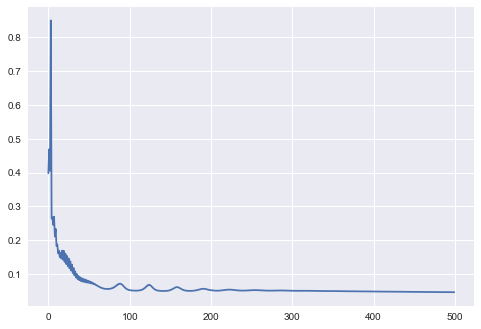

In [51]:
plt.plot(losses)

### Overfitting !!

In [ ]:
from visualize import plot_decision_boundary
plot_decision_boundary(lambda X:model.predict(X),x,y)

In [53]:
outputs = model.predict(x)
training_accuracy = np.sum(outputs==y)/y.shape[0]
print("Training Accuracy %.4f"%(training_accuracy*100))

Training Accuracy 96.7111


In [54]:
xt = pd.read_csv('Test Cases classify pts NN/Logistic_X_Test.csv')

In [55]:
xt.head()

,f1,f2
0,-0.799827,-0.003833
1,-0.757785,1.031370
2,1.036808,-0.357004
3,0.569531,1.083775
4,0.954205,-0.598412


In [56]:
xt = xt.values

In [57]:
xt

array([[-0.79982686, -0.00383313],
       [-0.75778472,  1.03137038],
       [ 1.03680832, -0.35700409],
       ...,
       [ 0.91472363,  0.51784857],
       [-0.81326194,  0.65111488],
       [-0.54779714,  0.15991242]])

In [58]:
yt_ = model.predict(xt)

In [61]:
df = pd.DataFrame(yt_,columns=['label'])

In [62]:
df.head()

,label
0,0
1,0
2,1
3,0
4,1


In [63]:
df.to_csv('Check1.csv',index=False)